In [1]:
# Load the required libraries
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
 

In [2]:
# Task 1 - Load a dataset and extract basic information 
df1 = pd.read_csv('data.csv')
df1.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


In [3]:
print(df1.info(),"\n")
print(df1.shape,"\n")
print(df1.describe())
for col in df1:
    print(col + '  ', str(df1[col].nunique()))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11914 entries, 0 to 11913
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Make               11914 non-null  object 
 1   Model              11914 non-null  object 
 2   Year               11914 non-null  int64  
 3   Engine Fuel Type   11911 non-null  object 
 4   Engine HP          11845 non-null  float64
 5   Engine Cylinders   11884 non-null  float64
 6   Transmission Type  11914 non-null  object 
 7   Driven_Wheels      11914 non-null  object 
 8   Number of Doors    11908 non-null  float64
 9   Market Category    8172 non-null   object 
 10  Vehicle Size       11914 non-null  object 
 11  Vehicle Style      11914 non-null  object 
 12  highway MPG        11914 non-null  int64  
 13  city mpg           11914 non-null  int64  
 14  Popularity         11914 non-null  int64  
 15  MSRP               11914 non-null  int64  
dtypes: float64(3), int64(5

In [4]:
# Task 2 - Clean your data set
print(df1.iloc[0,6])
df1.iloc[0,6] = df1.iloc[0,6]+ " "
print(df1.iloc[0,6])

MANUAL
MANUAL 


In [5]:
print(df1.groupby(df1['Transmission Type']).size(),"\n")
df1['Transmission Type'].value_counts()

Transmission Type
AUTOMATED_MANUAL     626
AUTOMATIC           8266
DIRECT_DRIVE          68
MANUAL              2934
MANUAL                 1
UNKNOWN               19
dtype: int64 



AUTOMATIC           8266
MANUAL              2934
AUTOMATED_MANUAL     626
DIRECT_DRIVE          68
UNKNOWN               19
MANUAL                 1
Name: Transmission Type, dtype: int64

In [6]:
df1 = df1.apply(lambda x: x.str.strip() if x.dtype == 'object' else x)
df1['Transmission Type'].value_counts()

AUTOMATIC           8266
MANUAL              2935
AUTOMATED_MANUAL     626
DIRECT_DRIVE          68
UNKNOWN               19
Name: Transmission Type, dtype: int64

AxesSubplot(0.125,0.125;0.775x0.755)


,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Convertible,28,18,3916,34500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11909,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,Midsize,4dr Hatchback,23,16,204,46120
11910,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,Midsize,4dr Hatchback,23,16,204,56670
11911,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,Midsize,4dr Hatchback,23,16,204,50620
11912,Acura,ZDX,2013,premium unleaded (recommended),300.0,6.0,AUTOMATIC,all wheel drive,4.0,Midsize,4dr Hatchback,23,16,204,50920


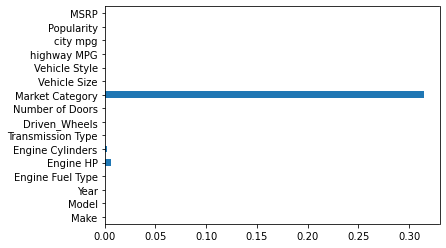

In [7]:
print(df1.isna().mean().plot(kind='barh'))
df1.loc[ : , df1.isna().mean() < .3]

In [8]:
df1 = df1.replace("NA", np.nan)
print(df1.isna().sum(),"\n")
df1 = df1.dropna()
df1.info()

Make                    0
Model                   0
Year                    0
Engine Fuel Type        3
Engine HP              69
Engine Cylinders       30
Transmission Type       0
Driven_Wheels           0
Number of Doors         6
Market Category      3742
Vehicle Size            0
Vehicle Style           0
highway MPG             0
city mpg                0
Popularity              0
MSRP                    0
dtype: int64 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8084 entries, 0 to 11913
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Make               8084 non-null   object 
 1   Model              8084 non-null   object 
 2   Year               8084 non-null   int64  
 3   Engine Fuel Type   8084 non-null   object 
 4   Engine HP          8084 non-null   float64
 5   Engine Cylinders   8084 non-null   float64
 6   Transmission Type  8084 non-null   object 
 7   Driven_Wheels      8084 

In [9]:
print(df1.duplicated().sum(), "\n")
print(df1.drop_duplicates(inplace = True),"\n")
print(df1.info(),"\n")

349 

None 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7735 entries, 0 to 11913
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Make               7735 non-null   object 
 1   Model              7735 non-null   object 
 2   Year               7735 non-null   int64  
 3   Engine Fuel Type   7735 non-null   object 
 4   Engine HP          7735 non-null   float64
 5   Engine Cylinders   7735 non-null   float64
 6   Transmission Type  7735 non-null   object 
 7   Driven_Wheels      7735 non-null   object 
 8   Number of Doors    7735 non-null   float64
 9   Market Category    7735 non-null   object 
 10  Vehicle Size       7735 non-null   object 
 11  Vehicle Style      7735 non-null   object 
 12  highway MPG        7735 non-null   int64  
 13  city mpg           7735 non-null   int64  
 14  Popularity         7735 non-null   int64  
 15  MSRP               7735 non-null   int64  
dtypes: float64

(array([   0.,  200.,  400.,  600.,  800., 1000., 1200.]),
 <a list of 7 Text major ticklabel objects>)

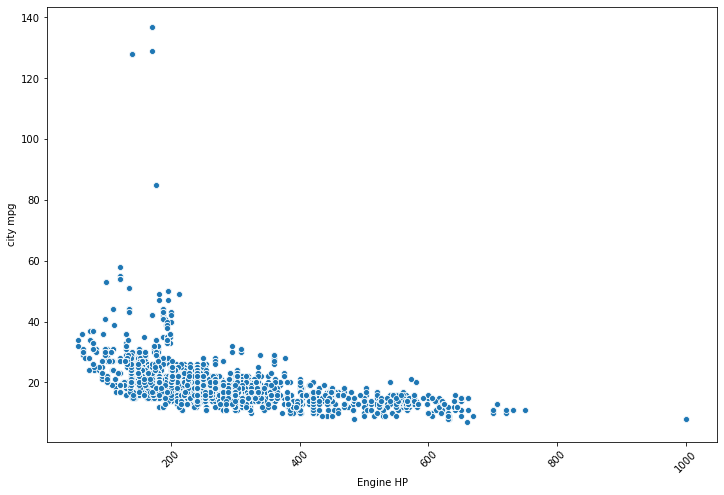

In [10]:
# Task 3 - Visualize patterns and outliers in your data set
fig,ax= plt.subplots(figsize =(12,8))
sns.scatterplot(x="Engine HP", y = "city mpg", data =df1)
plt.xticks(rotation=45)

(array([0, 1, 2, 3, 4]), <a list of 5 Text major ticklabel objects>)

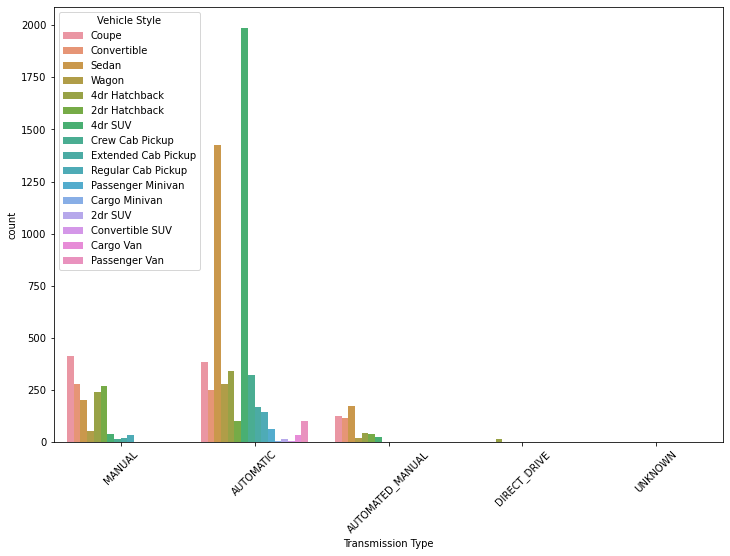

In [11]:
fig,ax= plt.subplots(figsize =(12,8))
sns.countplot(x="Transmission Type", hue = "Vehicle Style", data =df1, ax =ax)
plt.xticks(rotation=45)

(array([0, 1, 2, 3, 4]), <a list of 5 Text major ticklabel objects>)

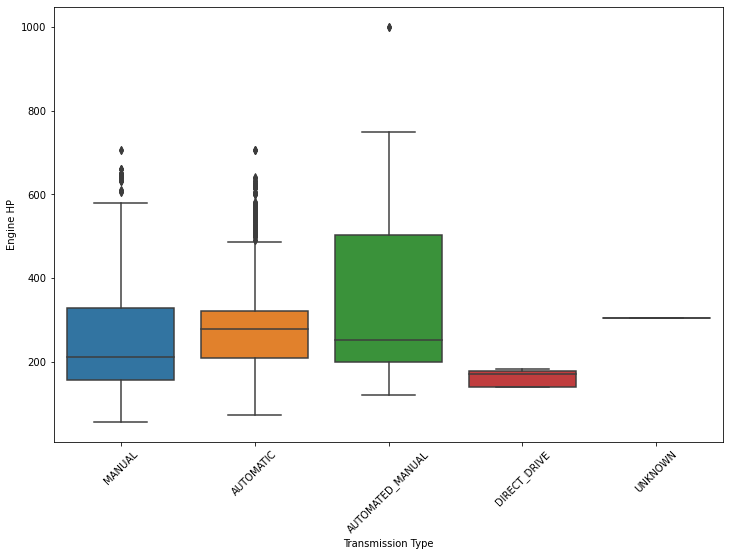

In [12]:
fig,ax= plt.subplots(figsize =(12,8))
sns.boxplot(x="Transmission Type", y = "Engine HP", data =df1)
plt.xticks(rotation=45)

C:\Users\ME\anaconda3\lib\site-packages\seaborn\distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\ME\anaconda3\lib\site-packages\seaborn\distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\ME\anaconda3\lib\site-packages\seaborn\distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)


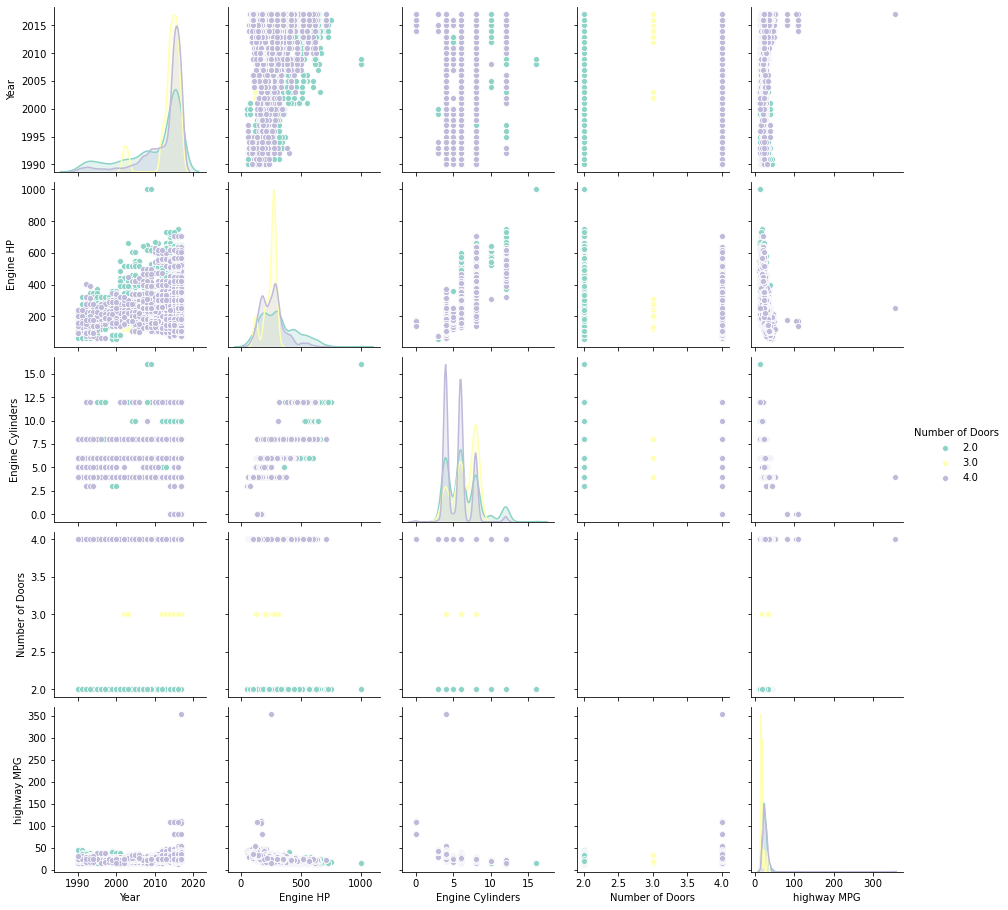

In [13]:
numeric_cols= df1.select_dtypes(include=np.number).columns.tolist()
sns.pairplot(df1, vars= numeric_cols[:5], hue ="Number of Doors", palette='Set3')

In [14]:
# Task 4 - Find and visualize correlations in your data set
df_num = df1[numeric_cols]
df_corr = df_num.corr()
print(df_corr, "\n")
print(df_corr.mean(), "\n")
print(df_corr.abs().mean(), "\n")

                      Year  Engine HP  Engine Cylinders  Number of Doors  \
Year              1.000000   0.234461         -0.051369         0.189846   
Engine HP         0.234461   1.000000          0.811138        -0.212644   
Engine Cylinders -0.051369   0.811138          1.000000        -0.192441   
Number of Doors   0.189846  -0.212644         -0.192441         1.000000   
highway MPG       0.219893  -0.468328         -0.597864         0.114555   
city mpg          0.183083  -0.510151         -0.613399         0.150835   
Popularity        0.126803   0.036553          0.010051        -0.042345   
MSRP              0.125162   0.655522          0.589557        -0.193079   

                  highway MPG  city mpg  Popularity      MSRP  
Year                 0.219893  0.183083    0.126803  0.125162  
Engine HP           -0.468328 -0.510151    0.036553  0.655522  
Engine Cylinders    -0.597864 -0.613399    0.010051  0.589557  
Number of Doors      0.114555  0.150835   -0.042345 -0.1930

(array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5, 7.5]),
 <a list of 8 Text major ticklabel objects>)

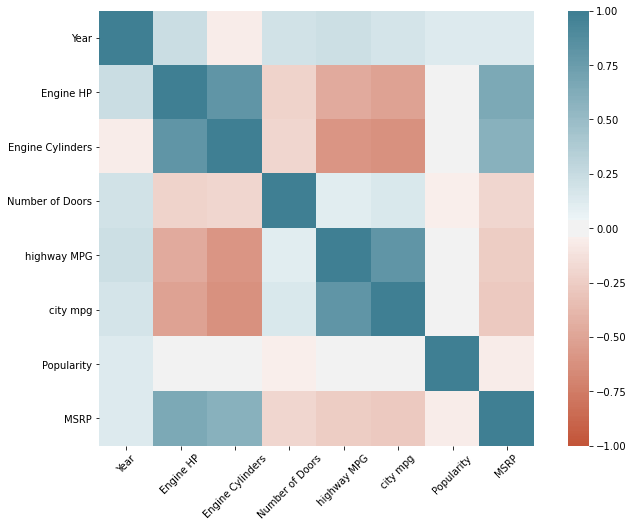

In [15]:
fig,ax = plt.subplots(figsize=(12,8))
sns.heatmap(df_corr, square = True, vmin = -1, vmax=1, center =0, cmap =sns.diverging_palette(20,220, n =200))
plt.xticks(rotation = 45)

In [16]:
# Task 5 - Cluster your data set to identify similar groups
print(df_num.columns.tolist())
x = StandardScaler().fit_transform(df_num)
kmeans = KMeans(n_clusters=5, init = "random")
kmeans.fit(x)
pred = kmeans.predict(x)
np.unique(pred)

['Year', 'Engine HP', 'Engine Cylinders', 'Number of Doors', 'highway MPG', 'city mpg', 'Popularity', 'MSRP']


array([0, 1, 2, 3, 4])

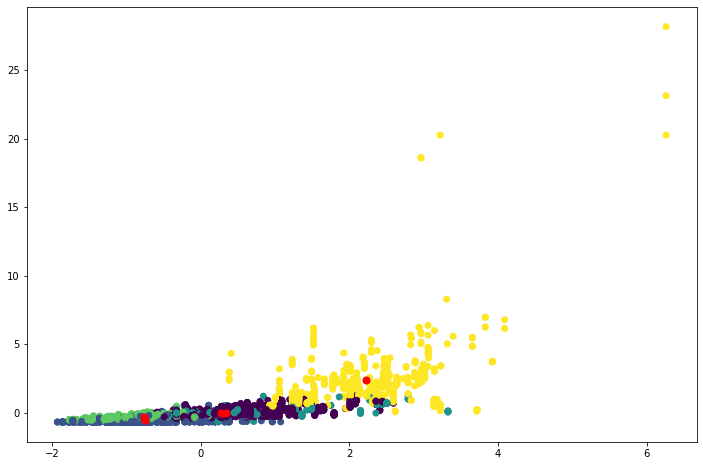

In [17]:
fig,ax= plt.subplots(figsize=(12,8))
plt.scatter(x[:,1], x[:,7] , c = pred, cmap ='viridis')
centers= kmeans.cluster_centers_
plt.scatter(centers[:,1], centers[:,7], c= "red", s =50)

In [18]:
# Task 6 - Visualize your data set with principal component analysis (PCA)
pca =PCA(n_components=0.95)
pca.fit(x)
pcad = pca.transform(x)
print(pca.explained_variance_ratio_)

[0.41627065 0.17703478 0.12889904 0.12449715 0.07321062 0.0410773 ]


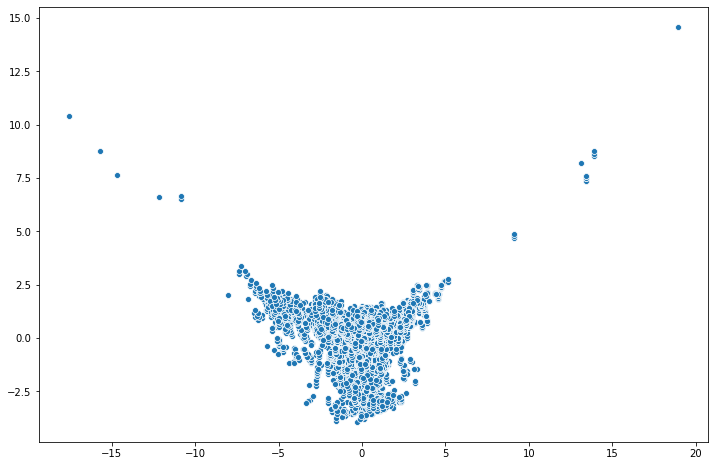

In [19]:
fig,ax = plt.subplots(figsize = (12,8))
sns.scatterplot(pcad[:,0], pcad[:,1])

In [20]:
pip install prince

Note: you may need to restart the kernel to use updated packages.


In [21]:
import prince 
pca2 = prince.PCA(n_components=6, n_iter=3, rescale_with_mean =True, rescale_with_std =True, copy = True,
                 engine = 'auto')
pca2 = pca2.fit(df_num)
pcad = pca.transform(x)
pca2.explained_inertia_

array([0.41627065, 0.17703478, 0.12889904, 0.12449715, 0.07321062,
       0.0410773 ])

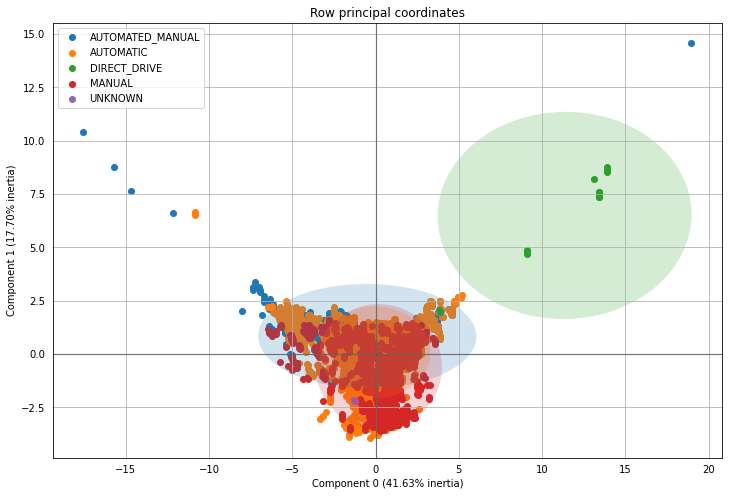

In [22]:
ax = pca2.plot_row_coordinates(df_num, ax =None, figsize=(12,8),  x_component = 0, y_component =1, labels =None, 
                             color_labels = df1['Transmission Type'], ellipse_outline=False, ellipse_fill =True, 
                             show_points = True)